# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*



## Polynomial model generalization exercises

Tasks: 

1. Evaluate infulence of the training data size on model generalization. 

2. Evaluate infulence of data noise on the model generalization. 

3. Generalize the polynomial model by simplification from high degree (top-down approach).


In [1]:
# Libraries 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import *
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(0)

pass 

### Sample data

In [2]:
# Generate data 
def fun(x, noise):
    """Underlying function"""
    return .6 * np.sin(x*6) + x + (x ** .8) * noise

# Generate training & testing data
def train_test_data(n_samples, noise_factor): 
    """Function to generate training and testing sets"""
    
    # train 
    np.random.seed(0)
    X_train = np.sort(np.random.rand(n_samples))
    noise_train = np.random.rand(n_samples) * noise_factor
    y_train = fun(X_train, noise_train) 
    X_train = X_train.reshape(-1, 1)
    
    # test 
    X_test = np.sort(np.random.rand(n_samples))
    noise_test = np.random.rand(n_samples) * noise_factor
    y_test = fun(X_test, noise_test)
    X_test = X_test.reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [3]:
# prepare data 
n_samples = 20
noise_factor = 0.9

X_train, y_train, X_test, y_test = train_test_data(n_samples, noise_factor)

In [4]:
X_train.shape

(20, 1)

In [5]:
y_train.shape

(20,)

In [6]:
# Underlaying function
X_fun = np.linspace(0, 1, 100)
noise_fun = np.ones(100) / 2. * noise_factor
y_fun = fun(X_fun, noise_fun)

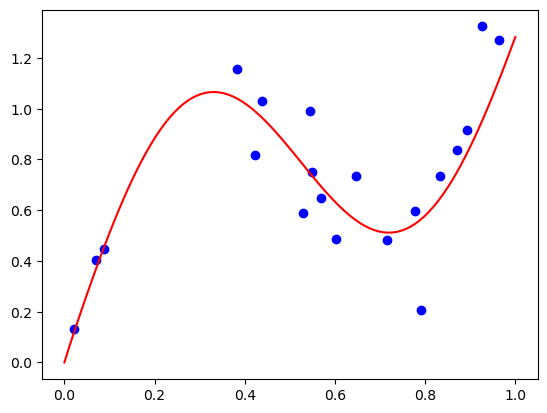

In [7]:
# Plot the data and underlaying function 
plt.plot(X_train, y_train, "bo")
plt.plot(X_fun, y_fun, "r-")

In [8]:
# Fit polynomial model (degree = 10)
from sklearn import linear_model

degree = 10
poly = PolynomialFeatures(degree)
X_train_poly = poly.fit_transform(X_train)

In [9]:
reg = linear_model.LinearRegression()
reg.fit(X_train_poly, y_train)


LinearRegression()

In [10]:
# Evaluate the model - training error 
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_train_poly)
MSE_train = mean_squared_error(y_train, y_pred)
MSE_train

0.015175634131904666

In [11]:
# Test error 
X_test_poly = poly.fit_transform(X_test)
y_test_pred = reg.predict(X_test_poly)
MSE_test = mean_squared_error(y_test, y_test_pred)
MSE_test

0.1027395617110968

In [12]:
# How well is the model generlized? 

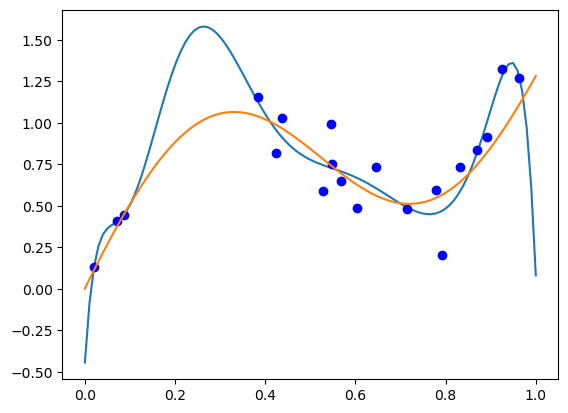

In [13]:
# Plot the model with the data? 
# Underlaying function
X_model = np.linspace(0, 1, 100)
X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
y_model_pred = reg.predict(X_model_poly)

plt.plot(X_model, y_model_pred, label = "model")
plt.plot(X_train, y_train, "bo", label = "data")
plt.plot(X_fun, y_fun, label = "underlying function")



### **Exercise 1:** Evaluate the infulence of the data size on model generalization
* Increse the parameter `n_samples` from 10 to 50, 100, 200, and 500
* What is the effect of training data size on its model performance while using model of higher degree than needed? 
* How important is to have enough samples? 

### **Exercise 2:** Evaluate the infulence of noise on the model generalization
* Decrese the noise parameter `noise_factor` from 0.9 to 0.5, and 0.1
* What is the effect of noise in the training data on model generalization? 
* Next, increase  the parameter `n_samples` from to 200 and keep `noise_factor` at 10% = 0.1. How does the model look?  

Option no.1 demonstrates the effect of number of samples used for training and testing of the Linear Regressor
We've used noise factor of 0.1


Mean Squared Error (train) for degree of: 10 and number of samples: 10 is:
8.95537745197461e-17
Mean Squared Error (train) for degree of: 10 and number of samples: 50 is:
0.0003114174278608766
Mean Squared Error (train) for degree of: 10 and number of samples: 100 is:
0.00026644963543974855
Mean Squared Error (train) for degree of: 10 and number of samples: 200 is:
0.00028847459858018524
Mean Squared Error (train) for degree of: 10 and number of samples: 500 is:
0.00030943980188080476


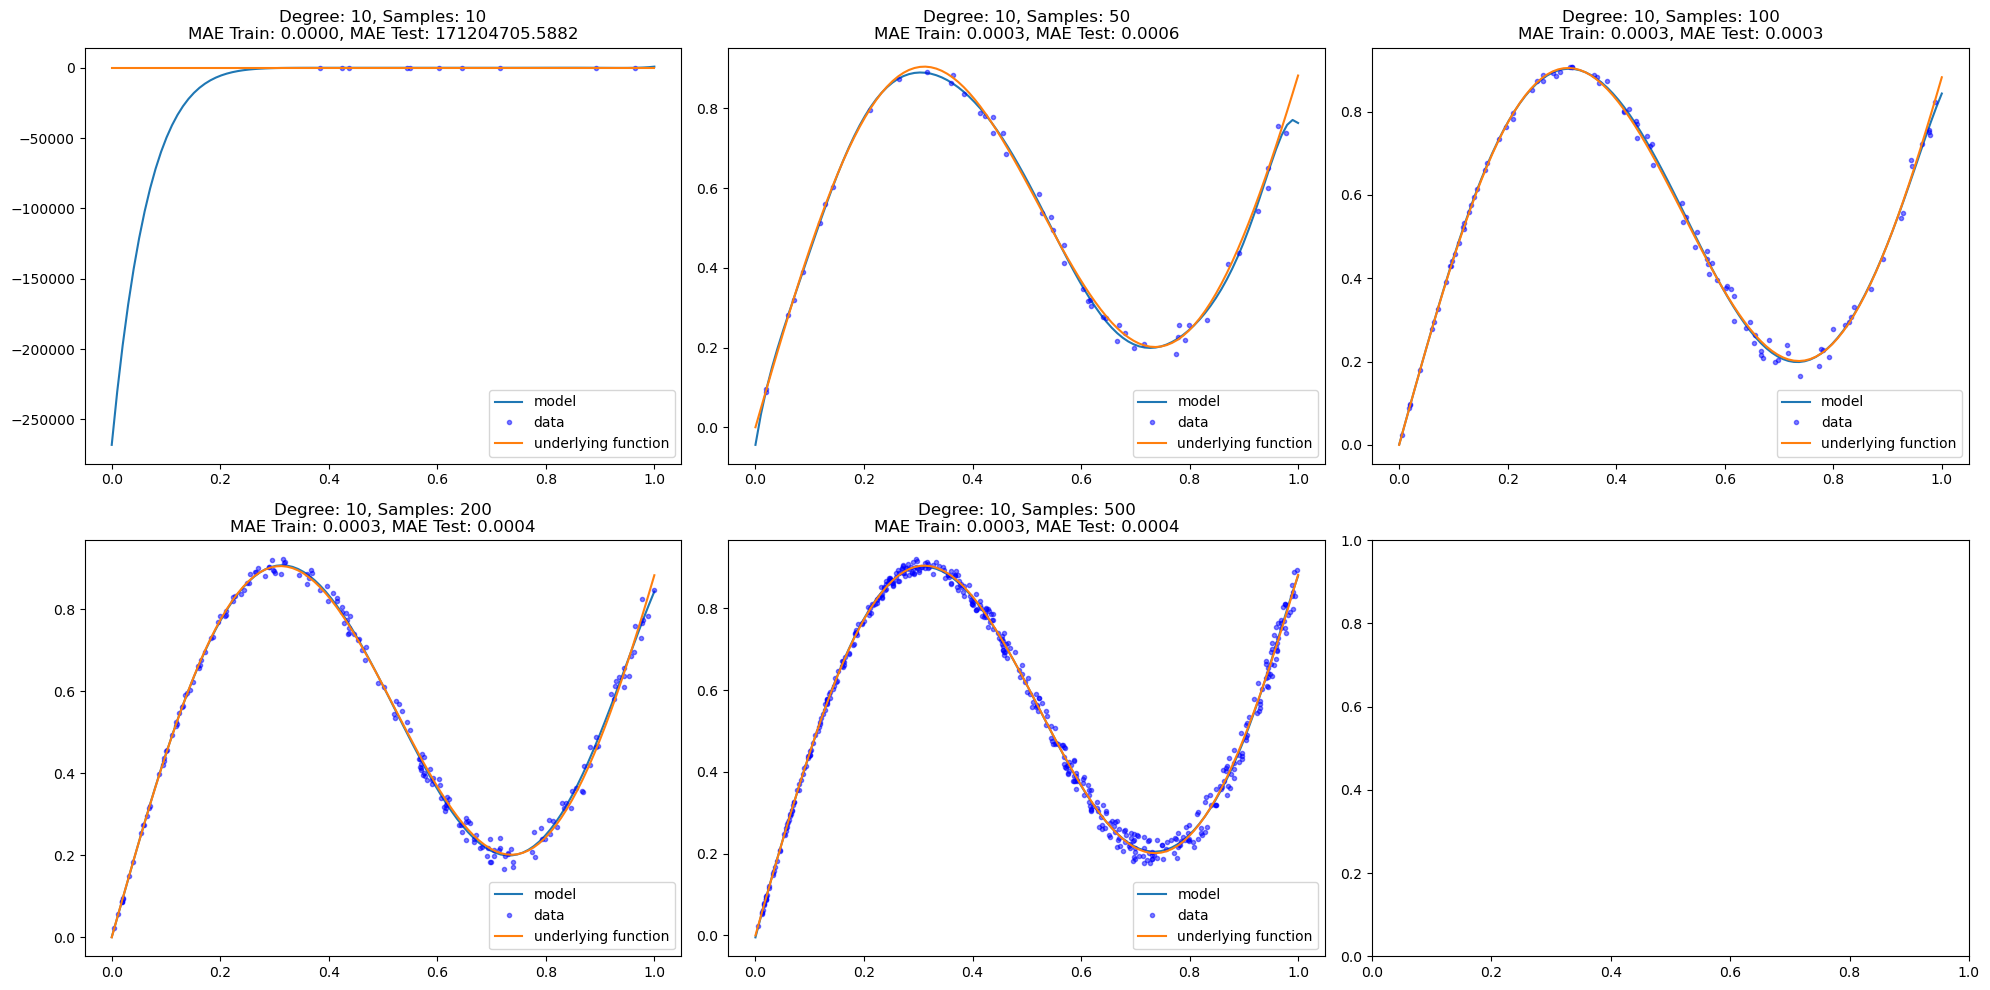

In [35]:
# OPT1:
# set noise factor to 0.1
# and degree of polynom to 10
degrees = [10, 10, 10, 10, 10]
n_samples = [10, 50, 100, 200, 500]
mae_1_test = []
mae_1_train = []
noise_factor = 0.1
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, (degree, n_sample) in enumerate(zip(degrees, n_samples)):
    X_train, y_train, X_test, y_test = train_test_data(n_sample, noise_factor)
    X_fun = np.linspace(0, 1, 100)
    noise_fun = np.ones(100) / 2. * noise_factor
    y_fun = fun(X_fun, noise_fun)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    reg = linear_model.LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_train_poly)
    MSE_train = mean_squared_error(y_train, y_pred)
    MSE_test = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
    print(f'Mean Squared Error (train) for degree of: {degree} and number of samples: {n_sample} is:')
    print(MSE_train)
    X_model = np.linspace(0, 1, 100)
    X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
    y_model_pred = reg.predict(X_model_poly)

    axs[i].plot(X_model, y_model_pred, label="model")
    axs[i].plot(X_train, y_train, "bo", label="data", markersize=3, alpha=0.5)
    axs[i].plot(X_fun, y_fun, label="underlying function")
    axs[i].set_title(f'Degree: {degree}, Samples: {n_sample}\nMAE Train: {MSE_train:.4f}, MAE Test: {MSE_test:.4f}')
    axs[i].legend()
    mae_1_train.append(MSE_train)
    mae_1_test.append(MSE_test)

plt.tight_layout()
plt.show()


It's been clear, what about increasing noise to 0.4 and 0.6

Mean Squared Error (train) for degree of: 10 and number of samples: 10 is:
4.391649658621713e-15
Mean Squared Error (train) for degree of: 10 and number of samples: 50 is:
0.004982706447421158
Mean Squared Error (train) for degree of: 10 and number of samples: 100 is:
0.004263234657257231
Mean Squared Error (train) for degree of: 10 and number of samples: 200 is:
0.004615588800873624
Mean Squared Error (train) for degree of: 10 and number of samples: 500 is:
0.004951056943743128


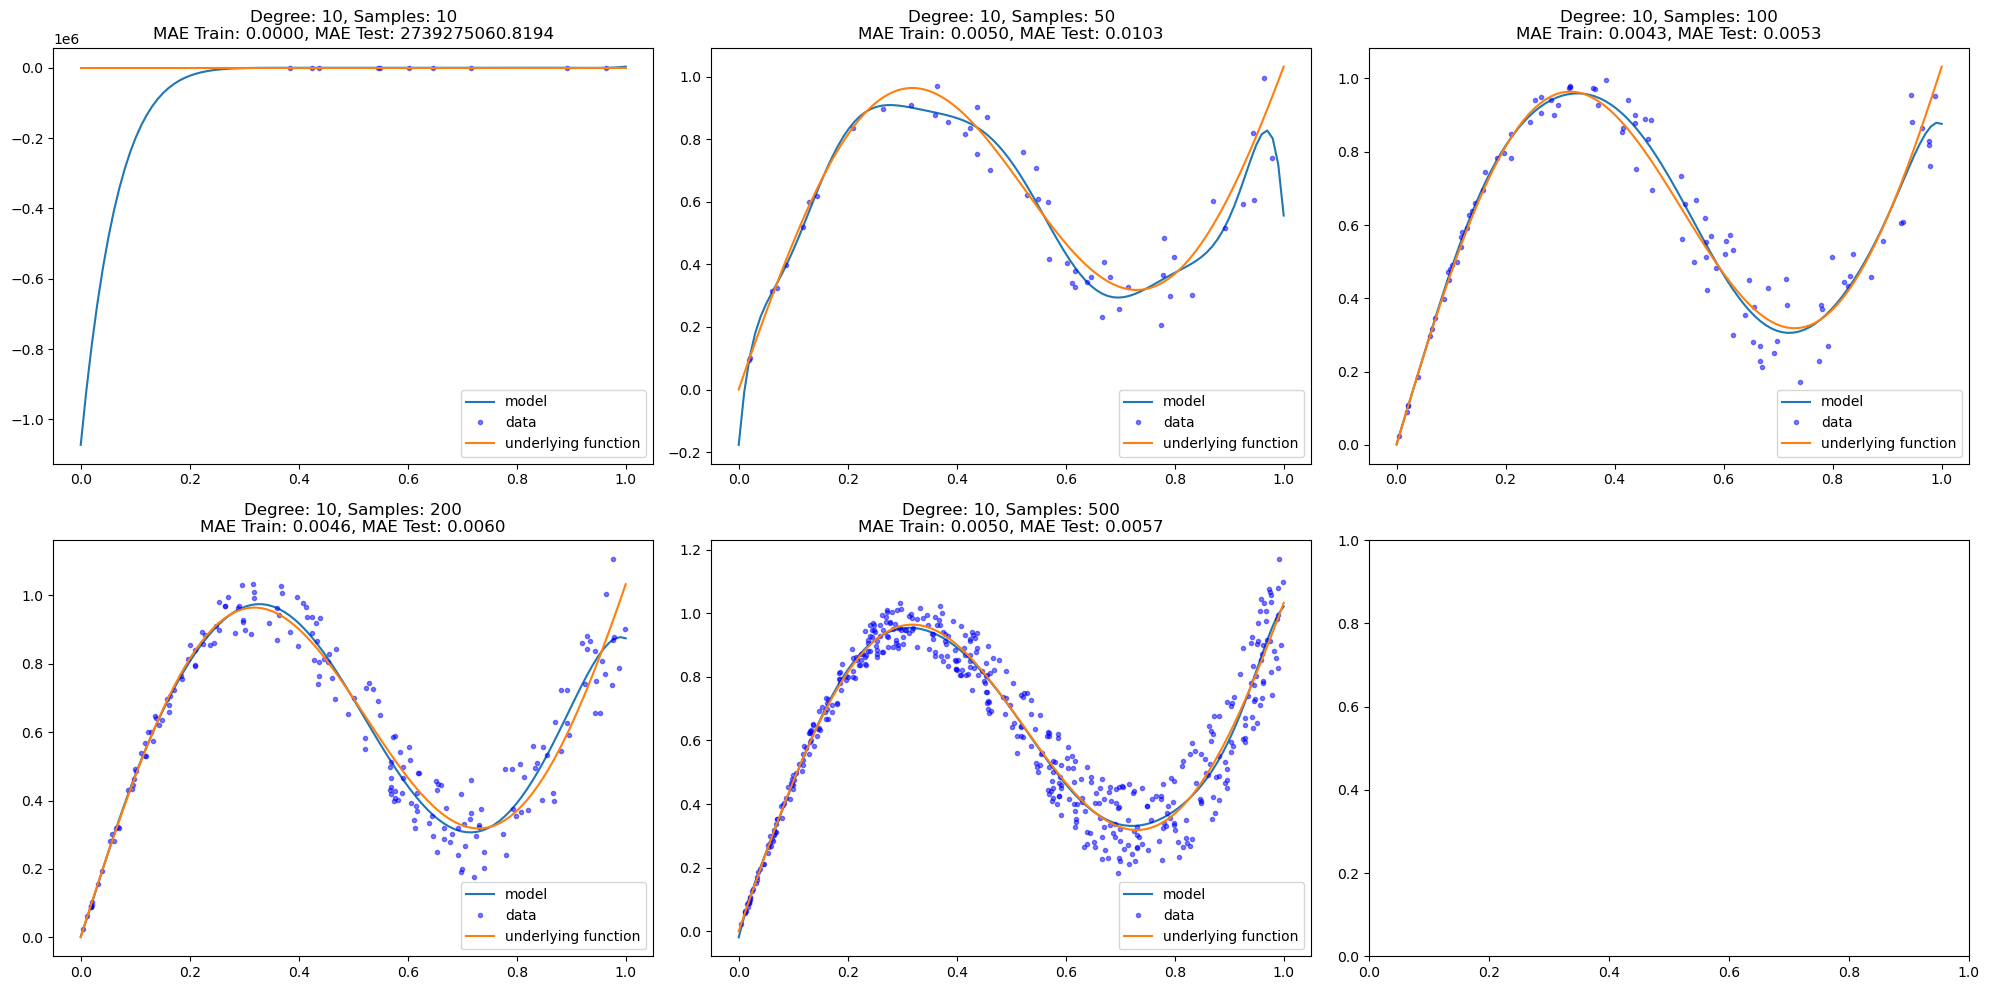

In [37]:
# OPT2:
# set noise factor to 0.4
# and degree of polynom to 10
degrees = [10, 10, 10, 10, 10]
n_samples = [10, 50, 100, 200, 500]
mae_2_test = []
mae_2_train = []
noise_factor = 0.4
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, (degree, n_sample) in enumerate(zip(degrees, n_samples)):
    X_train, y_train, X_test, y_test = train_test_data(n_sample, noise_factor)
    X_fun = np.linspace(0, 1, 100)
    noise_fun = np.ones(100) / 2. * noise_factor
    y_fun = fun(X_fun, noise_fun)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    reg = linear_model.LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_train_poly)
    MSE_train = mean_squared_error(y_train, y_pred)
    MSE_test = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
    print(f'Mean Squared Error (train) for degree of: {degree} and number of samples: {n_sample} is:')
    print(MSE_train)
    X_model = np.linspace(0, 1, 100)
    X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
    y_model_pred = reg.predict(X_model_poly)

    axs[i].plot(X_model, y_model_pred, label="model")
    axs[i].plot(X_train, y_train, "bo", label="data", markersize=3, alpha=0.5)
    axs[i].plot(X_fun, y_fun, label="underlying function")
    axs[i].set_title(f'Degree: {degree}, Samples: {n_sample}\nMAE Train: {MSE_train:.4f}, MAE Test: {MSE_test:.4f}')
    axs[i].legend()
    mae_2_train.append(MSE_train)
    mae_2_test.append(MSE_test)

plt.tight_layout()
plt.show()


Mean Squared Error (train) for degree of: 10 and number of samples: 10 is:
5.0935951698803076e-15
Mean Squared Error (train) for degree of: 10 and number of samples: 50 is:
0.019930844196466332
Mean Squared Error (train) for degree of: 10 and number of samples: 100 is:
0.01705296563236086
Mean Squared Error (train) for degree of: 10 and number of samples: 200 is:
0.018462352031221232
Mean Squared Error (train) for degree of: 10 and number of samples: 500 is:
0.019804241194560215


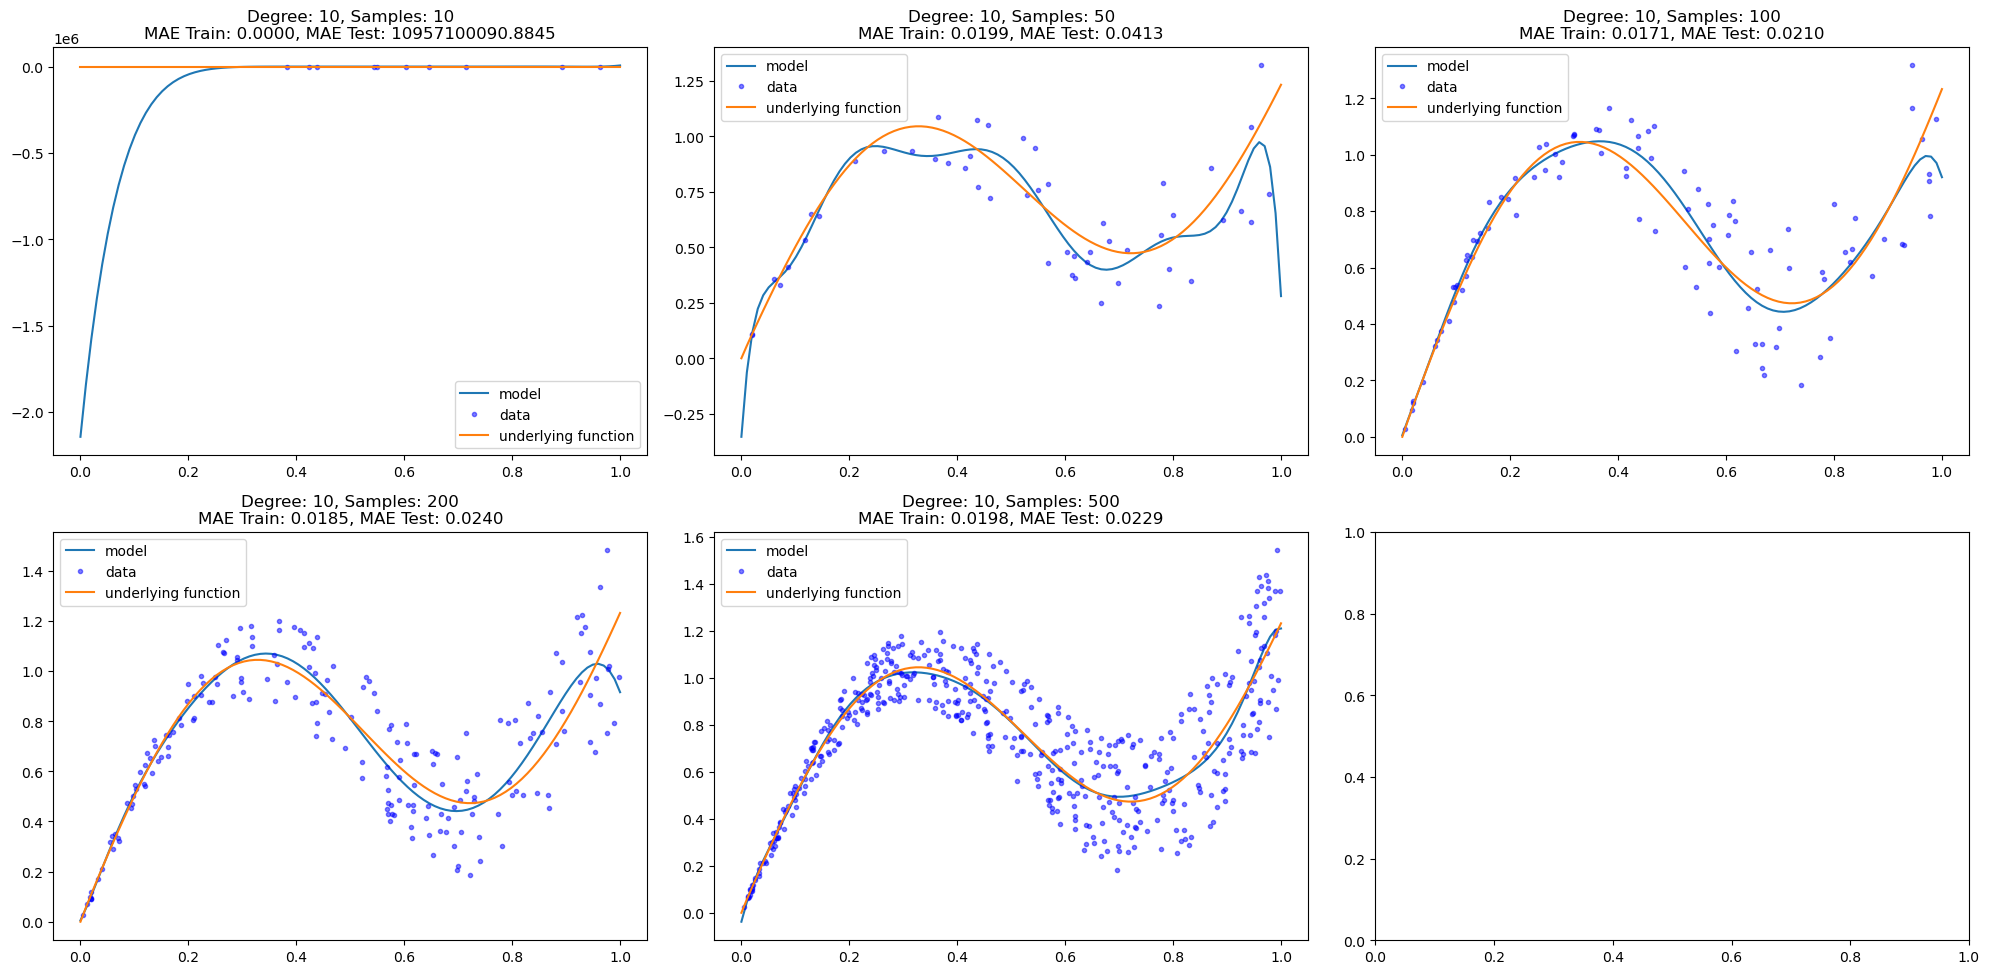

In [ ]:
# OPT3:
# set noise factor to 0.8
# and degree of polynom to 10
degrees = [10, 10, 10, 10, 10]
n_samples = [10, 50, 100, 200, 500]
mae_3_test = []
mae_3_train = []
noise_factor = 0.8
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, (degree, n_sample) in enumerate(zip(degrees, n_samples)):
    X_train, y_train, X_test, y_test = train_test_data(n_sample, noise_factor)
    X_fun = np.linspace(0, 1, 100)
    noise_fun = np.ones(100) / 2. * noise_factor
    y_fun = fun(X_fun, noise_fun)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    reg = linear_model.LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_train_poly)
    MSE_train = mean_squared_error(y_train, y_pred)
    MSE_test = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
    print(f'Mean Squared Error (train) for degree of: {degree} and number of samples: {n_sample} is:')
    print(MSE_train)
    X_model = np.linspace(0, 1, 100)
    X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
    y_model_pred = reg.predict(X_model_poly)

    axs[i].plot(X_model, y_model_pred, label="model")
    axs[i].plot(X_train, y_train, "bo", label="data", markersize=3, alpha=0.5)
    axs[i].plot(X_fun, y_fun, label="underlying function")
    axs[i].set_title(f'Degree: {degree}, Samples: {n_sample}\nMAE Train: {MSE_train:.4f}, MAE Test: {MSE_test:.4f}')
    axs[i].legend()
    mae_3_train.append(MSE_train)
    mae_3_test.append(MSE_test)

plt.tight_layout()
plt.show()


Mean Squared Error (train) for degree of: 4 and number of samples: 10 is:
0.0003082365380988184
Mean Squared Error (train) for degree of: 4 and number of samples: 50 is:
0.001339801919990582
Mean Squared Error (train) for degree of: 4 and number of samples: 100 is:
0.0014225954630132
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.0016698955348872107
Mean Squared Error (train) for degree of: 4 and number of samples: 500 is:
0.0012545075819419922


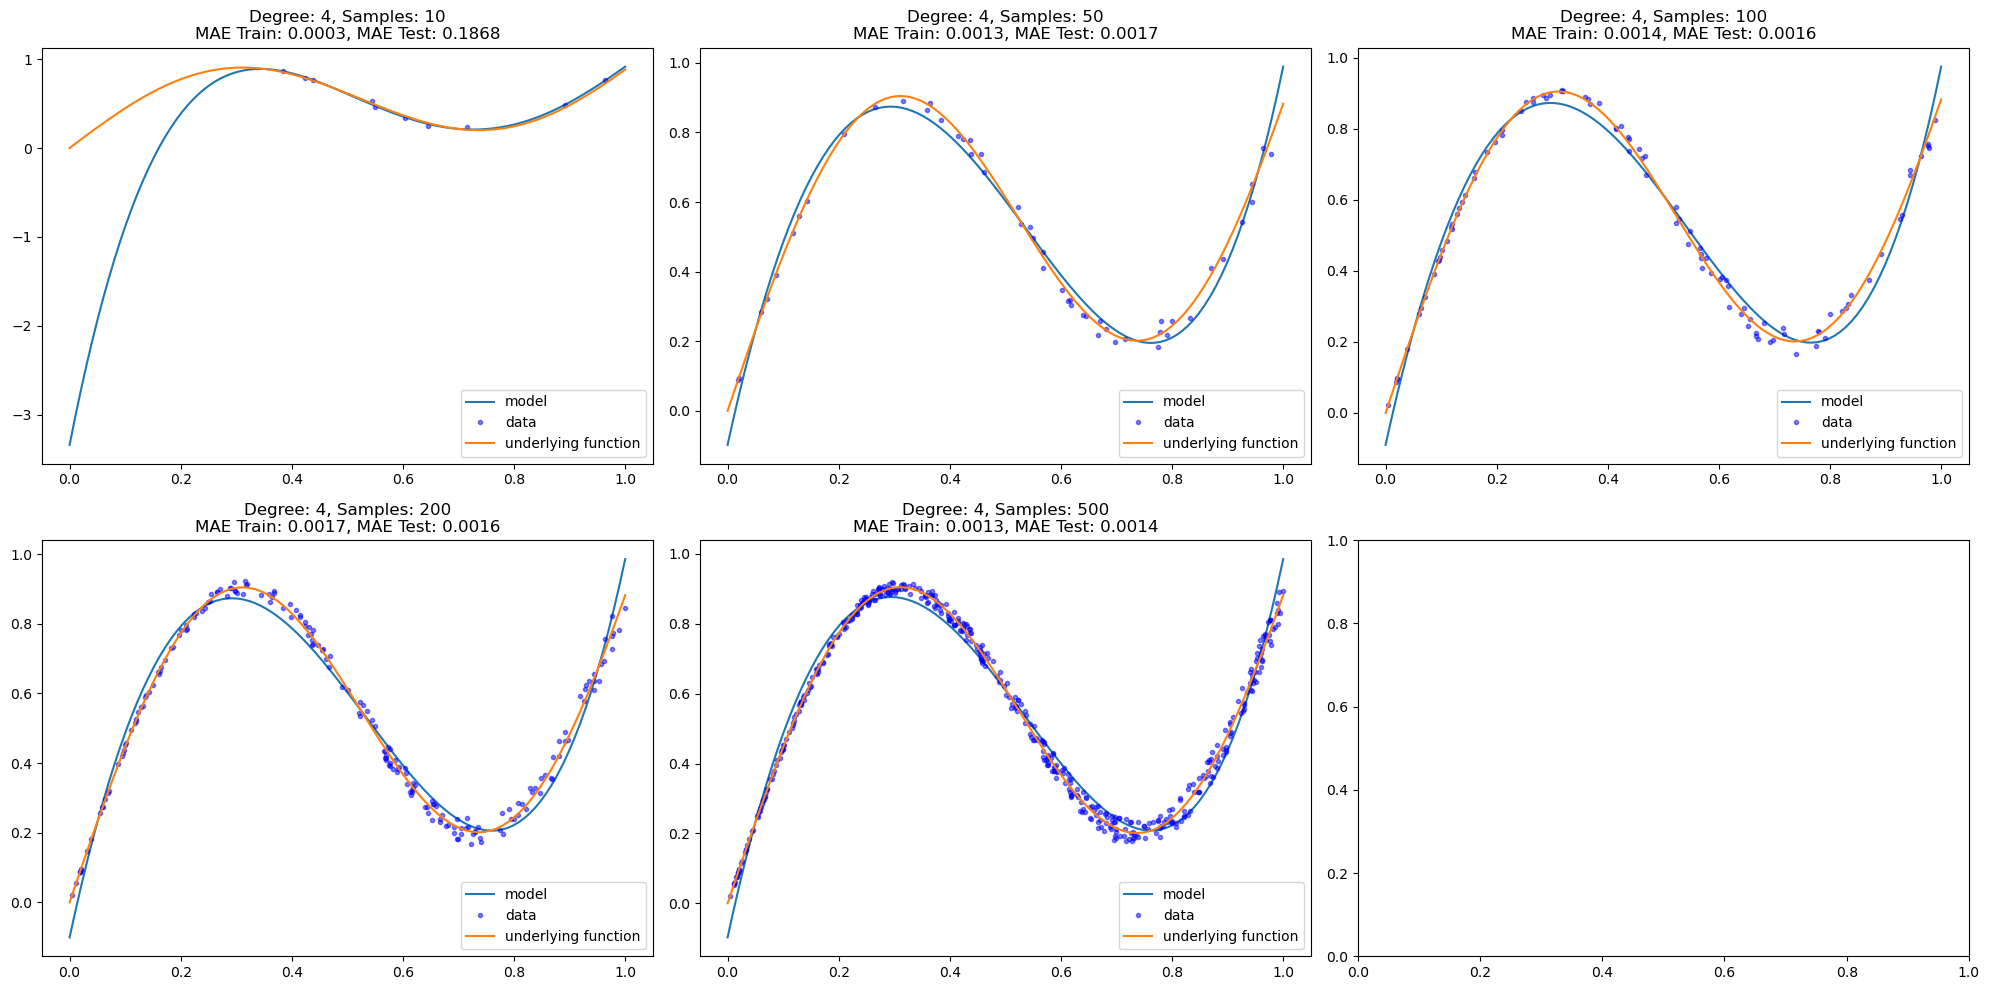

In [41]:
# OPT4:
# set noise factor to 0.1
# and degree of polynom to 4
degrees = [4, 4, 4, 4, 4]
n_samples = [10, 50, 100, 200, 500]
mae_4_test = []
mae_4_train = []
noise_factor = 0.1
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, (degree, n_sample) in enumerate(zip(degrees, n_samples)):
    X_train, y_train, X_test, y_test = train_test_data(n_sample, noise_factor)
    X_fun = np.linspace(0, 1, 100)
    noise_fun = np.ones(100) / 2. * noise_factor
    y_fun = fun(X_fun, noise_fun)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    reg = linear_model.LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_train_poly)
    MSE_train = mean_squared_error(y_train, y_pred)
    MSE_test = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
    print(f'Mean Squared Error (train) for degree of: {degree} and number of samples: {n_sample} is:')
    print(MSE_train)
    X_model = np.linspace(0, 1, 100)
    X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
    y_model_pred = reg.predict(X_model_poly)

    axs[i].plot(X_model, y_model_pred, label="model")
    axs[i].plot(X_train, y_train, "bo", label="data", markersize=3, alpha=0.5)
    axs[i].plot(X_fun, y_fun, label="underlying function")
    axs[i].set_title(f'Degree: {degree}, Samples: {n_sample}\nMAE Train: {MSE_train:.4f}, MAE Test: {MSE_test:.4f}')
    axs[i].legend()
    mae_4_train.append(MSE_train)
    mae_4_test.append(MSE_test)

plt.tight_layout()
plt.show()


Let's now demonstrate the level of noise on training with the same amount of data used for training and testing.

Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.0016698955348872107
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.0029414584055524264
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.007405493312353827
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.014430740439783265
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.024017199787840636
Mean Squared Error (train) for degree of: 4 and number of samples: 200 is:
0.029770884044604883


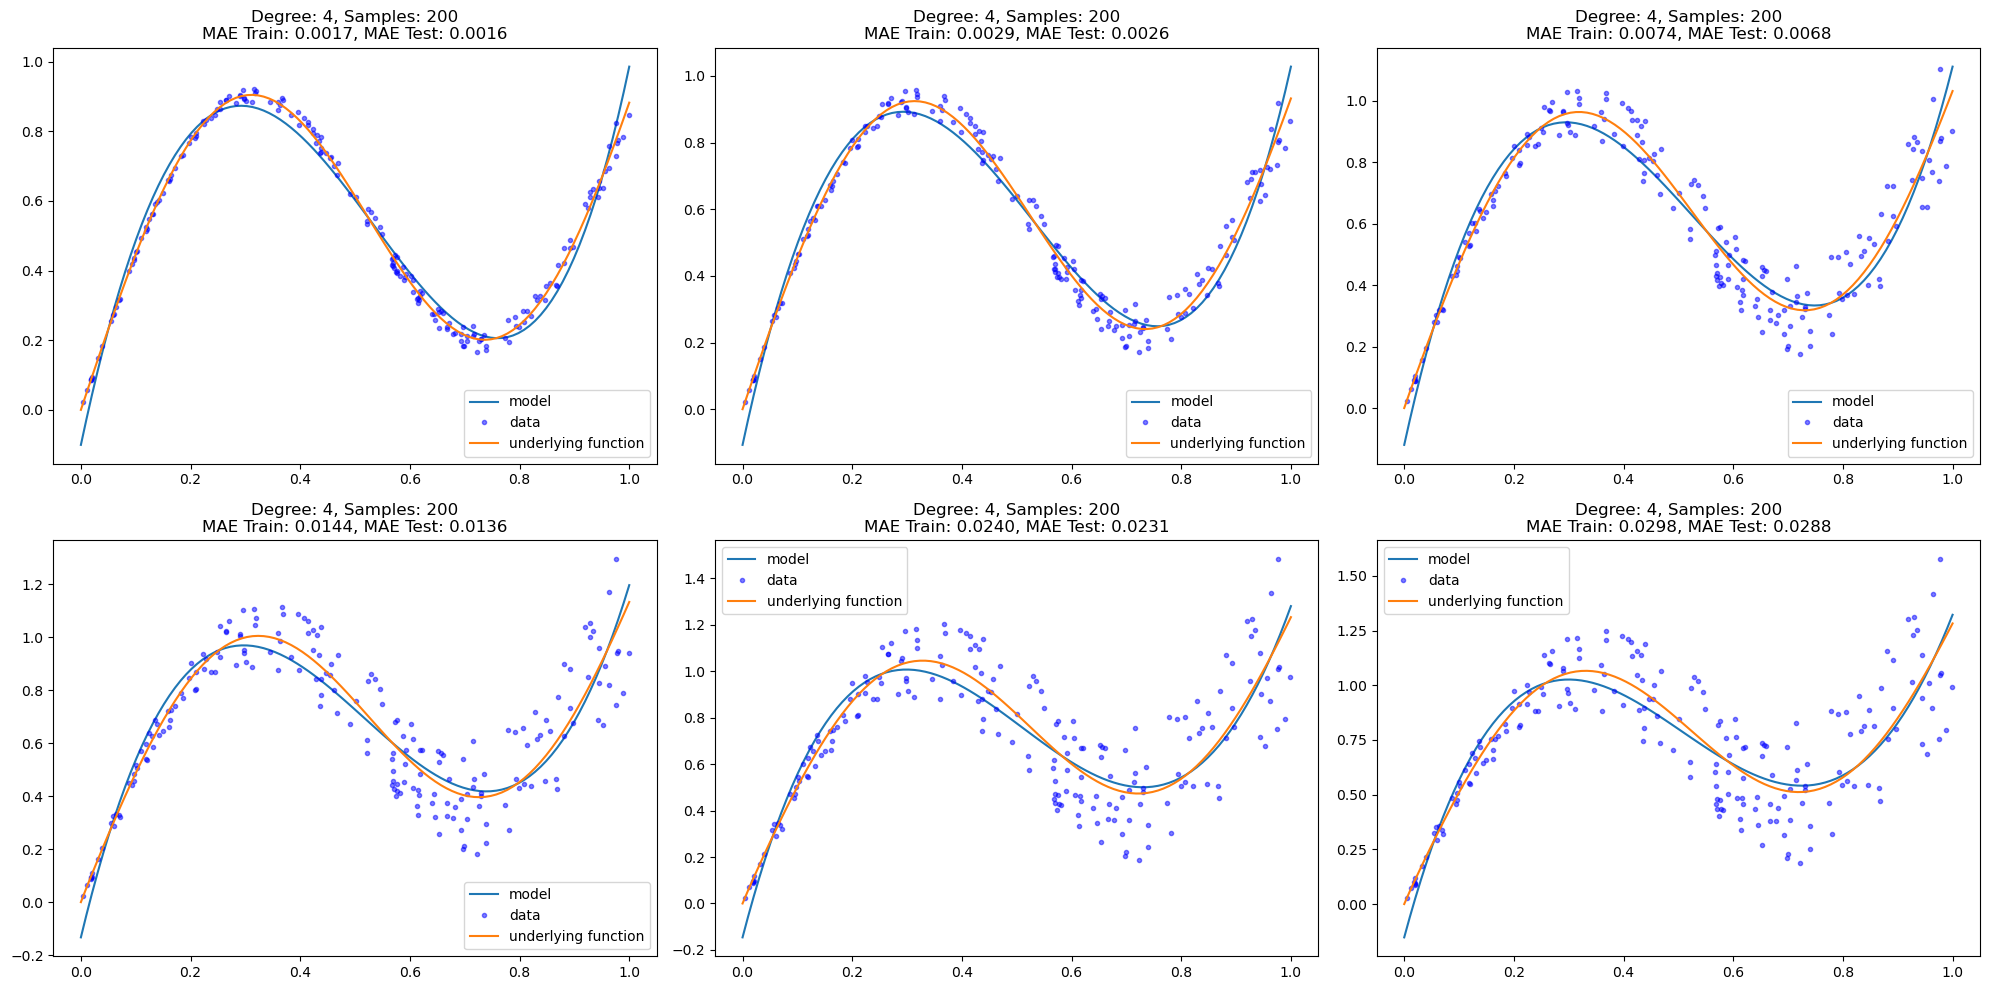

In [ ]:
# OPT5:
degree = 4
noises = [0.1, 0.2, 0.4, 0.6, 0.8, 0.9]
n_samples = [200, 200, 200, 200, 200, 200]
mae_4_test = []
mae_4_train = []
noise_factor = 0.1
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

for i, (noise_factor, n_sample) in enumerate(zip(noises, n_samples)):
    X_train, y_train, X_test, y_test = train_test_data(n_sample, noise_factor)
    X_fun = np.linspace(0, 1, 100)
    noise_fun = np.ones(100) / 2. * noise_factor
    y_fun = fun(X_fun, noise_fun)
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    reg = linear_model.LinearRegression()
    reg.fit(X_train_poly, y_train)
    y_pred = reg.predict(X_train_poly)
    MSE_train = mean_squared_error(y_train, y_pred)
    MSE_test = mean_squared_error(y_test, reg.predict(poly.fit_transform(X_test)))
    print(f'Mean Squared Error (train) for degree of: {degree} and number of samples: {n_sample} is:')
    print(MSE_train)
    X_model = np.linspace(0, 1, 100)
    X_model_poly = poly.fit_transform(X_model.reshape(-1, 1))
    y_model_pred = reg.predict(X_model_poly)

    axs[i].plot(X_model, y_model_pred, label="model")
    axs[i].plot(X_train, y_train, "bo", label="data", markersize=3, alpha=0.5)
    axs[i].plot(X_fun, y_fun, label="underlying function")
    axs[i].set_title(f'Degree: {degree}, Samples: {n_sample}\nMAE Train: {MSE_train:.4f}, MAE Test: {MSE_test:.4f}')
    axs[i].legend()
    mae_4_train.append(MSE_train)
    mae_4_test.append(MSE_test)

plt.tight_layout()
plt.show()
